<a href="https://colab.research.google.com/github/MILLERASPRILLA/Proyecto--Churn-/blob/main/Modelos/Regresi%C3%B3n_Logisitca_Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

# __PROYECTO DE GRADO__

> ## ____ Implementación de modelos de aprendizaje de máquina para la prevención de la fuga de clientes en una empresa de telecomunicaciones.
>
>
> <br>
>
> ## __Contenido__

>**Tema:**

>> Regresión Logistica 

$$\ln \left(\frac{p_i}{1-p_i} \right)=\beta_0 +\beta_1X_1+\beta_2X_2+...+\beta_pX_p  $$ 
donde $p=P(Y=1)$

>---

- Librerias

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model, tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.metrics import class_likelihood_ratios
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score

# EXTRACCIÓN DE LOS DATOS 

In [2]:
DF = pd.read_csv("https://raw.githubusercontent.com/MILLERASPRILLA/Proyecto--Churn-/main/Bases/Data_limpia%20(2).csv", sep= ",", encoding= "latin1")
DF.shape

(7043, 20)

In [3]:
DF.set_index("ID_CLIENTE", inplace = True)
DF.head()

,GENERO,ADULTO_MAYOR,CASADO,PERSONAS_A_CARGO,MESES_COMO_CLIENTE,TIENE_TELEFONIA,VARIAS_LINEAS,TIPO_INTERNET,SEGURIDAD_EN_LINEA,COPIA_DE_SEGURIDAD,PROTECCION_DISPOSITIVO,SOPORTE_TECNICO,SERVICIO_TV,SERVICIOS_STREAMING,PERIODO_CONTRATO,FACTURACION_ELECTRONICA,METODO_PAGO,COBRO_MENSUAL,ABANDONO
ID_CLIENTE,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


# PREPROCESAMIENTO

## EXPLORACIÓN

In [4]:
# Exploracion de las variables. 
DF.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GENERO                   7043 non-null   object 
 1   ADULTO_MAYOR             7043 non-null   int64  
 2   CASADO                   7043 non-null   object 
 3   PERSONAS_A_CARGO         7043 non-null   object 
 4   MESES_COMO_CLIENTE       7043 non-null   int64  
 5   TIENE_TELEFONIA          7043 non-null   object 
 6   VARIAS_LINEAS            7043 non-null   object 
 7   TIPO_INTERNET            7043 non-null   object 
 8   SEGURIDAD_EN_LINEA       7043 non-null   object 
 9   COPIA_DE_SEGURIDAD       7043 non-null   object 
 10  PROTECCION_DISPOSITIVO   7043 non-null   object 
 11  SOPORTE_TECNICO          7043 non-null   object 
 12  SERVICIO_TV              7043 non-null   object 
 13  SERVICIOS_STREAMING      7043 non-null   object 
 14  PERIODO_CONTRA

>> A pesar que en la limpieza de datos habíamos transformado las variables tipo objeto a tipo category, al cargar la base de datos Python las reconoce como objeto, por lo cual, reemplazaremos nuevamente el tipo de dato. 

In [5]:
# Convertir columnas en categorias
columnasConvertir = ['GENERO', 'ADULTO_MAYOR', 'CASADO', 'PERSONAS_A_CARGO', 'TIENE_TELEFONIA', 
               'VARIAS_LINEAS', 'TIPO_INTERNET', 'SEGURIDAD_EN_LINEA', 'COPIA_DE_SEGURIDAD', 
               'PROTECCION_DISPOSITIVO', 'SOPORTE_TECNICO', 'SERVICIO_TV', 'SERVICIOS_STREAMING', 
               'PERIODO_CONTRATO', 'FACTURACION_ELECTRONICA', 'METODO_PAGO', 'ABANDONO']
              
DF[columnasConvertir] = DF[columnasConvertir].astype("category")

In [6]:
# Reporte de cambios
DF.dtypes

GENERO                     category
ADULTO_MAYOR               category
CASADO                     category
PERSONAS_A_CARGO           category
MESES_COMO_CLIENTE            int64
TIENE_TELEFONIA            category
VARIAS_LINEAS              category
TIPO_INTERNET              category
SEGURIDAD_EN_LINEA         category
COPIA_DE_SEGURIDAD         category
PROTECCION_DISPOSITIVO     category
SOPORTE_TECNICO            category
SERVICIO_TV                category
SERVICIOS_STREAMING        category
PERIODO_CONTRATO           category
FACTURACION_ELECTRONICA    category
METODO_PAGO                category
COBRO_MENSUAL               float64
ABANDONO                   category
dtype: object

## ONE CODE

>> Toda vez que el modelo no recibe datos categóricos , codificaremos las variables categoricas en variables tipo one code

In [7]:
# Codificacion variables categoricas
DF_dummie = DF.select_dtypes(exclude=np.number)
DF_dummie = pd.get_dummies(DF_dummie, drop_first = True)
DF_dummie.head()

,GENERO_Male,ADULTO_MAYOR_1,CASADO_Yes,PERSONAS_A_CARGO_Yes,TIENE_TELEFONIA_Yes,VARIAS_LINEAS_No phone service,VARIAS_LINEAS_Yes,TIPO_INTERNET_Fiber optic,TIPO_INTERNET_No,SEGURIDAD_EN_LINEA_No internet service,...,SERVICIO_TV_Yes,SERVICIOS_STREAMING_No internet service,SERVICIOS_STREAMING_Yes,PERIODO_CONTRATO_One year,PERIODO_CONTRATO_Two year,FACTURACION_ELECTRONICA_Yes,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check,ABANDONO_Yes
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## Estandarización 

>> Toda vez que los datos cuantitativos en la base tienen escalas y unidades de medida diferentes consideramos necesario homogenizar estos datos para evitar introducir sesgos al modelo. 

>> Para esto homogenizaremos las variables usando la técnica de Robust Scaler que nos permitirá no solo ajustar nuestros datos a una distribución normal, si no que nos evitara que los datos atípicos sesguen los resultados de nuestro modelo.  

In [8]:
# Obtener variables numericas en otro data frame
DF_num = DF.select_dtypes(include=np.number)
# Estandarizar los datos numericos
datosEstandarizados = preprocessing.RobustScaler().fit_transform(DF_num)
# Crear dataframa con los datos estandarizados 
DF_num = pd.DataFrame(datosEstandarizados, columns = DF_num.columns, index = DF_num.index)
DF_num.head()

,MESES_COMO_CLIENTE,COBRO_MENSUAL
ID_CLIENTE,,
7590-VHVEG,-0.608696,-0.745170
5575-GNVDE,0.108696,-0.246550
3668-QPYBK,-0.586957,-0.303588
7795-CFOCW,0.347826,-0.516099
9237-HQITU,-0.586957,0.006440


## BASE FINAL

In [9]:
# concatenar los dataframe
DF_modelo =  pd.concat([DF_dummie, DF_num], axis=1)
DF_modelo.head() 

,GENERO_Male,ADULTO_MAYOR_1,CASADO_Yes,PERSONAS_A_CARGO_Yes,TIENE_TELEFONIA_Yes,VARIAS_LINEAS_No phone service,VARIAS_LINEAS_Yes,TIPO_INTERNET_Fiber optic,TIPO_INTERNET_No,SEGURIDAD_EN_LINEA_No internet service,...,SERVICIOS_STREAMING_Yes,PERIODO_CONTRATO_One year,PERIODO_CONTRATO_Two year,FACTURACION_ELECTRONICA_Yes,METODO_PAGO_Credit card (automatic),METODO_PAGO_Electronic check,METODO_PAGO_Mailed check,ABANDONO_Yes,MESES_COMO_CLIENTE,COBRO_MENSUAL
ID_CLIENTE,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,-0.608696,-0.745170
5575-GNVDE,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0.108696,-0.246550
3668-QPYBK,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,1,-0.586957,-0.303588
7795-CFOCW,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0.347826,-0.516099
9237-HQITU,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,1,-0.586957,0.006440


In [10]:
DF.to_csv("Data_dummie.csv")

# MODELADO

## MODELO 1

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_modelo["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_modelo.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(4930, 29)

In [ ]:
#   Entrenando al modelo
logreg=LogisticRegression() ### Llamo la regresión logistica
logreg.fit(X_train, y_train) ## Entreno el modelo

LogisticRegression()

### METRICAS MODELO  

In [ ]:
# prediccion del modelo 
y_pred_train=logreg.predict(X_train) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%

In [ ]:
cf = confusion_matrix(y_test, y_pred_test)

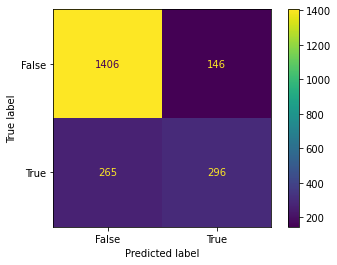

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#  viendo sus metricas
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      3622
           1       0.65      0.54      0.59      1308

    accuracy                           0.80      4930
   macro avg       0.75      0.72      0.73      4930
weighted avg       0.79      0.80      0.80      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1552
           1       0.67      0.53      0.59       561

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.73      2113
weighted avg       0.80      0.81      0.80      2113



>> Observamos que el modelo planteado clasifica bien el 80% de los datos en la prueba, sin embargo, tiene importantes dificultades para clasificar las personas que se irán de la compañía efectivamente, Como podemos observar de los 561 clientes fugados que tienen los datos de prueba solo acertó en 296.

>> la precisión del modelo muestra que solo el 65% de las personas que el modelo indico se irían de la compañía se fueron efectivamente. Por su parte, tan solo el 53% de las personas que el modelo sugiere no se irían de la compaña efectivamente se quedaron. 

>>Cabe recordar que el objetivo de este trabajo es predecir correctamente los clientes que se fugen, por lo que el RCALL nos sugiere que el modelo esta siendo poco efectivo en este sentido. 


### AREA BAJO LA CURVA ROC

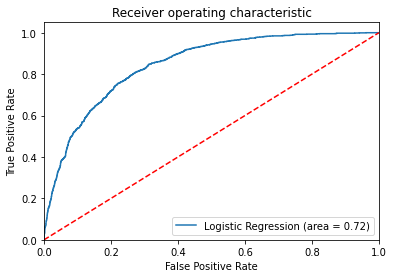

In [ ]:
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))  ## Calculo el area bajo la curva
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1]) ## Calculo la fpr(false positive rate),
## la tpr(true positive rate) y thresholds (los umbrales)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SELECCION DEL MEJOR THRESHOLD

In [ ]:
paraumbral=pd.DataFrame(np.transpose(np.round(roc_curve(y_train, logreg.predict_proba(X_train)[:,1]),4)), 
                        columns=["FPR", "TPR", "Umbral"])
## Distancia euclidiana al punto ideal
paraumbral["distancia"]=np.sqrt(paraumbral["FPR"]**2+(1-paraumbral["TPR"])**2)
paraumbral.sort_values(by="distancia")

,FPR,TPR,Umbral,distancia
809,0.2211,0.7561,0.3103,0.329200
807,0.2209,0.7554,0.3113,0.329585
825,0.2292,0.7630,0.3018,0.329699
808,0.2211,0.7554,0.3108,0.329719
805,0.2203,0.7546,0.3117,0.329778
...,...,...,...,...
2,0.0000,0.0191,0.8210,0.980900
3,0.0003,0.0191,0.8210,0.980900
1,0.0000,0.0008,0.8683,0.999200
0,0.0000,0.0000,1.8683,1.000000


### MODELO CON THRESHOLD OPTIMIZADO

In [ ]:
# Modelo con Threshold optimizado
thres=0.31
y_pred_train=np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)

### METRICAS MODELO OPTIMIZADO

In [ ]:
cm1 = confusion_matrix(y_test, y_pred_test)

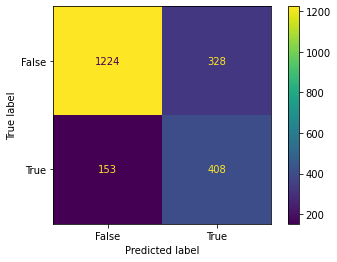

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(pd.get_dummies(y_train)[1], y_pred_train))
print("En los datos de prueba \n",classification_report(pd.get_dummies(y_test)[1], y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      3622
           1       0.55      0.76      0.64      1308

    accuracy                           0.77      4930
   macro avg       0.73      0.77      0.74      4930
weighted avg       0.81      0.77      0.78      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1552
           1       0.55      0.73      0.63       561

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113



>> Con el ajuste al umbral, encontramos que el modelo es afectado en su accuracy en un 3% pasamos del 80% al 77%. Sin embargo, podemos identificar que este modelo predice mejor a las personas que se fugan de la compañía , de las 561 personas fugadas que aparecen en la base de datos el modelo acertó en 408. 

>> La precisión para los churn se ve castigada en un 12% esto implica que aunque el modelo está clasificando correctamente a más personas como churn también le está dando una predicción incorrecta a más individuos, lo que podría ocasionar costos innecesarios para la compañía .  

## MODELO 2 -> BALANCEO DE DATOS 

### Balanceo de datos

In [ ]:
#   Entrenando al modelo
logreg=LogisticRegression(class_weight = {0 : 1, 1 : 2}) ### Llamo la regresión logistica
logreg.fit(X_train, y_train) ## Entreno el modelo

LogisticRegression(class_weight={0: 1, 1: 2})

In [ ]:
# prediccion del modelo 
y_pred_train=logreg.predict(X_train) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%

### METRICAS DEL MODELO

In [ ]:
cf2 = confusion_matrix(y_test, y_pred_test)

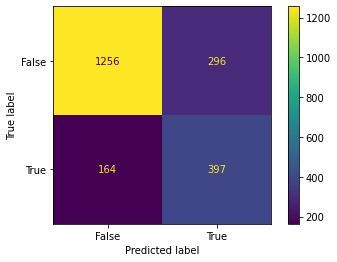

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf2, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#  viendo sus metricas
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84      3622
           1       0.56      0.72      0.63      1308

    accuracy                           0.78      4930
   macro avg       0.73      0.76      0.74      4930
weighted avg       0.80      0.78      0.78      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.88      0.81      0.85      1552
           1       0.57      0.71      0.63       561

    accuracy                           0.78      2113
   macro avg       0.73      0.76      0.74      2113
weighted avg       0.80      0.78      0.79      2113



>> El modelo balanceado muestra una tasa de falsos positivos más baja que el modelo anterior, sin embargo la precisión de los clientes churn sigue teniendo una porcentaje bajo de 0,57% lo que significa que el modelo sigue clasificando como fugados una cantidad importante de clientes que no consideran fugarse de la compañía. 

>> El modelo sigue clasificando mejor a los no fugados que a los fugados, el f1- score para esta categoría es de 0,85 % mientras que para los fugados es de 0,63% 

### AREA BAJO LA CURVA ROC

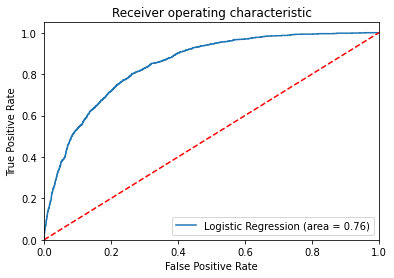

In [ ]:
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))  ## Calculo el area bajo la curva
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1]) ## Calculo la fpr(false positive rate),
## la tpr(true positive rate) y thresholds (los umbrales)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SELECCION DEL MEJOR THRESHOLD

In [ ]:
paraumbral=pd.DataFrame(np.transpose(np.round(roc_curve(y_train, logreg.predict_proba(X_train)[:,1]),4)), 
                        columns=["FPR", "TPR", "Umbral"])
## Distancia euclidiana al punto ideal
paraumbral["distancia"]=np.sqrt(paraumbral["FPR"]**2+(1-paraumbral["TPR"])**2)
paraumbral.sort_values(by="distancia")

,FPR,TPR,Umbral,distancia
863,0.2355,0.7706,0.4577,0.328762
865,0.2363,0.7714,0.4562,0.328779
861,0.2352,0.7699,0.4579,0.329037
862,0.2355,0.7699,0.4578,0.329251
864,0.2363,0.7706,0.4567,0.329336
...,...,...,...,...
2,0.0000,0.0168,0.9042,0.983200
3,0.0003,0.0168,0.9042,0.983200
1,0.0000,0.0008,0.9288,0.999200
0,0.0000,0.0000,1.9288,1.000000


### MODELO CON THRESHOLD OPTIMIZADO

In [ ]:
# Modelo con Threshold optimizado
thres=0.4577
y_pred_train=np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)

### METRICAS MODELO OPTIMIZADO

In [ ]:
cm3 = confusion_matrix(y_test, y_pred_test)

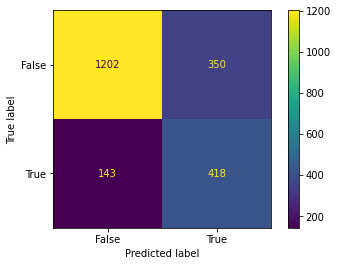

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm3, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(pd.get_dummies(y_train)[1], y_pred_train))
print("En los datos de prueba \n",classification_report(pd.get_dummies(y_test)[1], y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.90      0.76      0.83      3622
           1       0.54      0.77      0.64      1308

    accuracy                           0.77      4930
   macro avg       0.72      0.77      0.73      4930
weighted avg       0.81      0.77      0.78      4930

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1552
           1       0.54      0.75      0.63       561

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113



>> No encontramos una mejoría significativa ajustando el punto de corte, de hecho , aunque este es el modelo que clasifica mas clientes churn correctamente, también es el modelo de los probados hasta el momento que más falsos positivos genera

>> Lo anteriormente dicho es corroborar  por las métricas de precisión y rcall, en donde nos encontramos con el rcall mas alto de los modelos implementados en la categoría churn pero al mismo tiempo la precisión mas baja para esta misma categoría. 



## MODELO 3 -> UNDERSAMPLING

### UNDERSAMPLING 

In [ ]:
# Longitud de la clase minoritaria 
clase_minoria = len(DF_modelo[DF_modelo['ABANDONO_Yes'] == 1])
print(clase_minoria)

1869


In [ ]:
# sacando los indices de la clase mayoritaria 
clase_mayoria_indices  =  DF_modelo[DF_modelo['ABANDONO_Yes']== 0].index
print(clase_mayoria_indices)

Index(['7590-VHVEG', '5575-GNVDE', '7795-CFOCW', '1452-KIOVK', '6713-OKOMC',
       '6388-TABGU', '9763-GRSKD', '7469-LKBCI', '8091-TTVAX', '5129-JLPIS',
       ...
       '0871-OPBXW', '3605-JISKB', '9767-FFLEM', '8456-QDAVC', '7750-EYXWZ',
       '2569-WGERO', '6840-RESVB', '2234-XADUH', '4801-JZAZL', '3186-AJIEK'],
      dtype='object', name='ID_CLIENTE', length=5174)


In [ ]:
# Muestreo de la clase mayoritaria
muestreo_clase_mayoritaria = np.random.choice(clase_mayoria_indices,
                                              clase_minoria, 
                                              replace= False)
print(len(muestreo_clase_mayoritaria))

1869


In [ ]:
# Seleccion de indices de la clase minoritaria 
clase_minoritaria_indices = DF_modelo[DF_modelo['ABANDONO_Yes']== 1].index
print(clase_minoritaria_indices)

Index(['3668-QPYBK', '9237-HQITU', '9305-CDSKC', '7892-POOKP', '0280-XJGEX',
       '4190-MFLUW', '8779-QRDMV', '1066-JKSGK', '6467-CHFZW', '8665-UTDHZ',
       ...
       '1980-KXVPM', '7703-ZEKEF', '0723-DRCLG', '5482-NUPNA', '1122-JWTJW',
       '1699-HPSBG', '8775-CEBBJ', '6894-LFHLY', '0639-TSIQW', '8361-LTMKD'],
      dtype='object', name='ID_CLIENTE', length=1869)


In [ ]:
# concatenar los indices 
union_indices = np.concatenate([clase_minoritaria_indices,muestreo_clase_mayoritaria])

In [ ]:
# base de datos copn undersampling 
DF_SAMPLING = DF_modelo.loc[union_indices]
DF_SAMPLING.shape

(3738, 30)

### MODELO 

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_SAMPLING["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_SAMPLING.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(2616, 29)

In [ ]:
#   Entrenando al modelo
logreg=LogisticRegression() ### Llamo la regresión logistica
logreg.fit(X_train, y_train) ## Entreno el modelo

LogisticRegression()

In [ ]:
# prediccion del modelo 
y_pred_train=logreg.predict(X_train) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%

### METRICAS DEL MODELO 

In [ ]:
cm6 = confusion_matrix(y_test, y_pred_test)

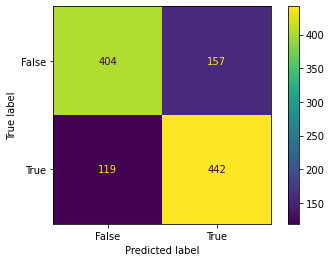

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm6, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.79      0.74      0.77      1308
           1       0.76      0.81      0.78      1308

    accuracy                           0.77      2616
   macro avg       0.78      0.77      0.77      2616
weighted avg       0.78      0.77      0.77      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.77      0.72      0.75       561
           1       0.74      0.79      0.76       561

    accuracy                           0.75      1122
   macro avg       0.76      0.75      0.75      1122
weighted avg       0.76      0.75      0.75      1122



>> A partir del undersampling el modelo entiende de mejor manera el comportamiento de los cliente churn, de los 561 clientes fugados en los datos de prueba identifico correctamente 442, así mismo, encontramos la tasa de falsos negativos para los clientes churn mas baja entre los modelos probados hasta el momento. 

>> si bien es cierto en f1 score para los clientes no churn disminuye de forma significativa, pasando del 0,83% al 0,75% comparado con el modelo anterior, para el objetivo del proyecto es más valioso la detención de los clientes churn, por lo que consideramos este un modelo más adecuado. 

### AREA BAJO LA CURVA ROC 

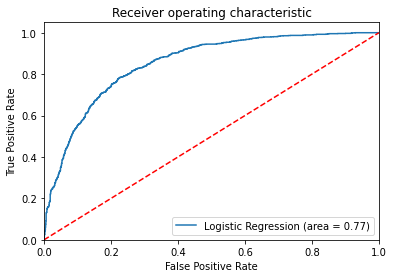

In [ ]:
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))  ## Calculo el area bajo la curva
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1]) ## Calculo la fpr(false positive rate),
## la tpr(true positive rate) y thresholds (los umbrales)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SELECCION DEL MEJOR THRESHOLD 

In [ ]:
paraumbral=pd.DataFrame(np.transpose(np.round(roc_curve(y_train, logreg.predict_proba(X_train)[:,1]),4)), 
                        columns=["FPR", "TPR", "Umbral"])
## Distancia euclidiana al punto ideal
paraumbral["distancia"]=np.sqrt(paraumbral["FPR"]**2+(1-paraumbral["TPR"])**2)
paraumbral.sort_values(by="distancia")

,FPR,TPR,Umbral,distancia
446,0.2271,0.7852,0.5368,0.312592
444,0.2255,0.7829,0.5398,0.313022
442,0.2240,0.7813,0.5419,0.313059
438,0.2217,0.7783,0.5441,0.313531
436,0.2209,0.7775,0.5449,0.313533
...,...,...,...,...
2,0.0000,0.0122,0.9268,0.987800
3,0.0008,0.0122,0.9255,0.987800
1,0.0000,0.0008,0.9396,0.999200
0,0.0000,0.0000,1.9396,1.000000


### METRICAS MODELO OPTIMIZADO 

In [ ]:
# Modelo con Threshold optimizado
thres=0.5368
y_pred_train=np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)

In [ ]:
cm7 = confusion_matrix(y_test, y_pred_test)

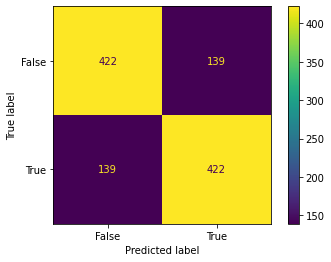

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm7, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(pd.get_dummies(y_train)[1], y_pred_train))
print("En los datos de prueba \n",classification_report(pd.get_dummies(y_test)[1], y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.78      0.77      0.78      1308
           1       0.78      0.79      0.78      1308

    accuracy                           0.78      2616
   macro avg       0.78      0.78      0.78      2616
weighted avg       0.78      0.78      0.78      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       561
           1       0.75      0.75      0.75       561

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



>> Con el ajuste del punto de corte encontramos que mejoro el Rcall para los clientes no churn, sin embargo, la tasa de falsos negativos para los churn aumento, como observamos es un modelo mas equilibrado para las dos categorías. 

## MODELO 4 -> BALANCEO Y UNDERSAMPLING

In [ ]:
# Partición de datos de entrenamiento y prueba 
Y=DF_SAMPLING["ABANDONO_Yes"] ## Seleccionamos la variable objetivo (binaria)
X=DF_SAMPLING.drop("ABANDONO_Yes", axis=1) ## Seleccionamos las variables explicativas
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=123,test_size=0.3, stratify=Y) ## Dividimos en entrenamiento y prueba, y estratificando
##por la variable Y 
X_train.shape

(2616, 29)

In [ ]:
#   Entrenando al modelo
logreg=LogisticRegression(class_weight = {0 : 1, 1 : 2}) ### Llamo la regresión logistica
logreg.fit(X_train, y_train) ## Entreno el modelo

LogisticRegression(class_weight={0: 1, 1: 2})

In [ ]:
# prediccion del modelo 
y_pred_train=logreg.predict(X_train) ### Un umbral de 50%
y_pred_test=logreg.predict(X_test) ##  Un umbral de 50%

### METRICAS MODELO 

In [ ]:
cf8 = confusion_matrix(y_test, y_pred_test)

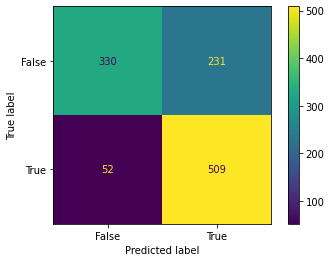

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf8, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
#  viendo sus metricas
print("En los datos de entrenamiento \n",classification_report(y_train, y_pred_train))
print("En los datos de prueba \n",classification_report(y_test, y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.87      0.59      0.70      1308
           1       0.69      0.91      0.79      1308

    accuracy                           0.75      2616
   macro avg       0.78      0.75      0.75      2616
weighted avg       0.78      0.75      0.75      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.86      0.59      0.70       561
           1       0.69      0.91      0.78       561

    accuracy                           0.75      1122
   macro avg       0.78      0.75      0.74      1122
weighted avg       0.78      0.75      0.74      1122



>> Este modelo es el que mejor clasifica clientes no churn como lo observamos de los 561 clientes churn en los datos de prueba clasifico correctamente 509, sin embargo el rcall para los clientes no churn empeoro notablemente, siendo el rcall para clientes no churn mas bajo de los modelos entrenados hasta el momento. 

>> Lo anterior puede tener un costo importante para la compañía en términos de medidas de retención a clientes que no piensan fugarse de la compañía. 

### AREA BAJO LA CURVA ROC 

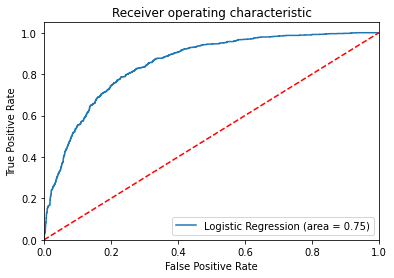

In [ ]:
logit_roc_auc = roc_auc_score(y_train, logreg.predict(X_train))  ## Calculo el area bajo la curva
fpr, tpr, thresholds = roc_curve(y_train, logreg.predict_proba(X_train)[:,1]) ## Calculo la fpr(false positive rate),
## la tpr(true positive rate) y thresholds (los umbrales)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### SELECCION DEL MEJOR THRESHOLD

In [ ]:
paraumbral=pd.DataFrame(np.transpose(np.round(roc_curve(y_train, logreg.predict_proba(X_train)[:,1]),4)), 
                        columns=["FPR", "TPR", "Umbral"])
## Distancia euclidiana al punto ideal
paraumbral["distancia"]=np.sqrt(paraumbral["FPR"]**2+(1-paraumbral["TPR"])**2)
paraumbral.sort_values(by="distancia")

,FPR,TPR,Umbral,distancia
430,0.2294,0.7852,0.6977,0.314266
428,0.2286,0.7836,0.6989,0.314781
432,0.2309,0.7859,0.6964,0.314887
434,0.2317,0.7867,0.6960,0.314931
429,0.2294,0.7836,0.6988,0.315362
...,...,...,...,...
2,0.0000,0.0115,0.9606,0.988500
3,0.0008,0.0115,0.9603,0.988500
1,0.0000,0.0008,0.9670,0.999200
0,0.0000,0.0000,1.9670,1.000000


In [ ]:
# Modelo con Threshold optimizado
thres=0.6977
y_pred_train=np.where(logreg.predict_proba(X_train)[:,1] > thres, 1, 0)
y_pred_test=np.where(logreg.predict_proba(X_test)[:,1] > thres, 1, 0)

### METRICAS MODELO OPTIMIZADO 

In [ ]:
cm10 = confusion_matrix(y_test, y_pred_test)

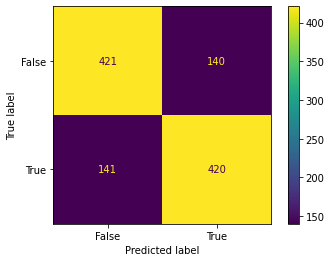

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm10, display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
print("En los datos de entrenamiento \n",classification_report(pd.get_dummies(y_train)[1], y_pred_train))
print("En los datos de prueba \n",classification_report(pd.get_dummies(y_test)[1], y_pred_test))

En los datos de entrenamiento 
               precision    recall  f1-score   support

           0       0.78      0.77      0.78      1308
           1       0.77      0.78      0.78      1308

    accuracy                           0.78      2616
   macro avg       0.78      0.78      0.78      2616
weighted avg       0.78      0.78      0.78      2616

En los datos de prueba 
               precision    recall  f1-score   support

           0       0.75      0.75      0.75       561
           1       0.75      0.75      0.75       561

    accuracy                           0.75      1122
   macro avg       0.75      0.75      0.75      1122
weighted avg       0.75      0.75      0.75      1122



>> El ajuste del punto de corte parece eliminar el efecto del balanceo de los datos, este modelo da resultados sumamente parecidos al modelo de undersampling donde las métricas de precisión rcall y r1 score para ambas categorías dan una tasa de 75%.  

In [ ]:
pd.DataFrame(np.transpose(logreg.coef_), index=X_train.columns, columns=["betas"]).sort_values(by="betas", ascending= False)

,betas
TIPO_INTERNET_Fiber optic,0.920864
SERVICIOS_STREAMING_Yes,0.363170
METODO_PAGO_Electronic check,0.329337
ADULTO_MAYOR_1,0.287977
FACTURACION_ELECTRONICA_Yes,0.282172
VARIAS_LINEAS_Yes,0.232398
VARIAS_LINEAS_No phone service,0.187689
SERVICIO_TV_Yes,0.179153
COBRO_MENSUAL,-0.008096
METODO_PAGO_Credit card (automatic),-0.009659


In [ ]:

print(cross_val_score(logreg, X_train, y_train, cv = 10).mean())

0.7515428036617823
